### IPL 2025 Mega Auction Dataset
- The IPL 2025 Mega Auction Dataset offers an extensive and detailed look into the high-stakes bidding process of cricket’s most celebrated T20 league, featuring data for over 600 players. This dataset includes essential information such as Player Name, Team Allocation, Player Type (Batsman, Bowler, All-rounder, or Wicketkeeper), Base Price, and Sold Price. It's perfect for uncovering trends in player valuations, analyzing team compositions, predicting bidding patterns, and understanding franchise strategies, making it a goldmine for cricket fans, analysts, and data enthusiasts.

- Dataset link : https://www.kaggle.com/datasets/souviksamanta1053/ipl-2025-mega-auction-dataset/data

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install opendatasets
import opendatasets as op
%matplotlib inline

### Download dataset using opendatasets


In [3]:
dataset_url = "https://kaggle.com/souviksamanta1053/ipl-2025-mega-auction-dataset"
op.download(dataset_url)
#{"username":"omchoksi04","key":"5ab3e87c127e70f503295b93a9173bc0"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omchoksi04
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/souviksamanta1053/ipl-2025-mega-auction-dataset


### Load dataset

In [4]:
df=pd.read_csv("/content/ipl-2025-mega-auction-dataset/ipl_2025_auction_players.csv")
df

,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,-,21.00
1,Rajat Patidar,RCB,BAT,-,11.00
2,Yash Dayal,RCB,BOWL,-,5.00
3,Jasprit Bumrah,MI,BOWL,-,18.00
4,Suryakumar Yadav,MI,BAT,-,16.35
...,...,...,...,...,...
618,Vijay Yadav,-,AR,0.30,TBA
619,Jofra Archer,RR,BOWL,2.00,12.50
620,Saurabh Netravalkar,-,BOWL,0.30,TBA
621,Hardik Tamore,-,WK,0.30,TBA


In [7]:
df.shape,df.info(),df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Players  623 non-null    object
 1   Team     623 non-null    object
 2   Type     623 non-null    object
 3   Base     623 non-null    object
 4   Sold     623 non-null    object
dtypes: object(5)
memory usage: 24.5+ KB


((623, 5),
 None,
                Players Team  Type  Base Sold
 count              623  623   623   623  623
 unique             620   11     4     9   72
 top     Daryl Mitchell    -  BOWL  0.30  TBA
 freq                 2  395   216   322  293)

In [10]:
#Null value checking
print(df.isnull().sum())
print("there is no null value")

Players    0
Team       0
Type       0
Base       0
Sold       0
dtype: int64
there is no null value


In [12]:
# See all unique values in the 'Base' column
print(df['Base'].unique())


['-' '2.00' '1.50' '0.75' '1.00' '0.30' '0.50' '0.40' '1.25']


In [15]:


# Clean and convert: Replace '-' and force conversion to numeric (coerce errors to NaN)
df['Base'] = pd.to_numeric(df['Base'].replace('-', np.nan), errors='coerce')
df['Sold'] = pd.to_numeric(df['Sold'].replace('-', np.nan), errors='coerce')

print(df.dtypes)

df.dropna(subset=['Base', 'Sold'], inplace=True)

df.head()


Players     object
Team        object
Type        object
Base       float64
Sold       float64
dtype: object


,Players,Team,Type,Base,Sold
46,Jos Buttler,GT,BAT,2.0,15.75
47,Shreyas Iyer,PBKS,BAT,2.0,26.75
48,Rishabh Pant,LSG,BAT,2.0,27.00
49,Kagiso Rabada,GT,BOWL,2.0,10.75
50,Arshdeep Singh,PBKS,BOWL,2.0,18.00


### Highest Sold Price

In [16]:
df_sorted_by_sold = df.sort_values('Sold', ascending=False)
df_sorted_by_sold.head(10)

,Players,Team,Type,Base,Sold
48,Rishabh Pant,LSG,BAT,2.0,27.00
47,Shreyas Iyer,PBKS,BAT,2.0,26.75
66,Venkatesh Iyer,KKR,AR,2.0,23.75
52,Yuzvendra Chahal,PBKS,BOWL,2.0,18.00
50,Arshdeep Singh,PBKS,BOWL,2.0,18.00
46,Jos Buttler,GT,BAT,2.0,15.75
55,KL Rahul,DC,BAT,2.0,14.00
80,Josh Hazlewood,RCB,BOWL,2.0,12.50
79,Trent Boult,MI,BOWL,2.0,12.50
619,Jofra Archer,RR,BOWL,2.0,12.50


### Compare sold vs base


In [17]:
# Create a difference column
df['Price_Difference'] = df['Sold'] - df['Base']


df.sort_values('Price_Difference', ascending=False).head(10)


,Players,Team,Type,Base,Sold,Price_Difference
48,Rishabh Pant,LSG,BAT,2.0,27.00,25.00
47,Shreyas Iyer,PBKS,BAT,2.0,26.75,24.75
66,Venkatesh Iyer,KKR,AR,2.0,23.75,21.75
52,Yuzvendra Chahal,PBKS,BOWL,2.0,18.00,16.00
50,Arshdeep Singh,PBKS,BOWL,2.0,18.00,16.00
46,Jos Buttler,GT,BAT,2.0,15.75,13.75
55,KL Rahul,DC,BAT,2.0,14.00,12.00
80,Josh Hazlewood,RCB,BOWL,2.0,12.50,10.50
79,Trent Boult,MI,BOWL,2.0,12.50,10.50
619,Jofra Archer,RR,BOWL,2.0,12.50,10.50


### Group by Team

In [18]:
team_stats = df.groupby('Team')['Sold'].agg(['count', 'mean', 'sum'])
team_stats.rename(columns={'count': 'Players_Count', 'mean': 'Average_Sold', 'sum': 'Total_Spent'}, inplace=True)
team_stats.sort_values('Total_Spent', ascending=False)

,Players_Count,Average_Sold,Total_Spent
Team,,,
PBKS,23,4.789130,110.15
RCB,19,4.328947,82.25
DC,19,3.831579,72.80
GT,20,3.442500,68.85
LSG,18,3.811111,68.60
CSK,20,2.747500,54.95
KKR,15,3.396667,50.95
MI,18,2.488889,44.80
SRH,15,2.986667,44.80


### Distribution by Player Type

In [19]:
type_stats = df.groupby('Type')['Sold'].agg(['count', 'mean', 'sum'])
type_stats.rename(columns={'count': 'Count', 'mean': 'Average_Sold', 'sum': 'Total_Spent'}, inplace=True)
type_stats

,Count,Average_Sold,Total_Spent
Type,,,
AR,59,2.711864,160.00
BAT,51,3.819608,194.80
BOWL,71,4.000704,284.05


### Distribution of Sold Price


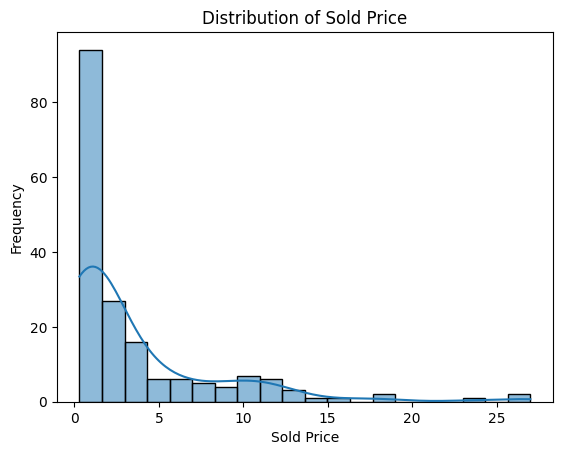

In [24]:
sns.histplot(data=df, x='Sold', kde=True, bins=20)
plt.title('Distribution of Sold Price')
plt.xlabel('Sold Price')
plt.ylabel('Frequency')
plt.show()


### Box Plot of Base vs. Sold

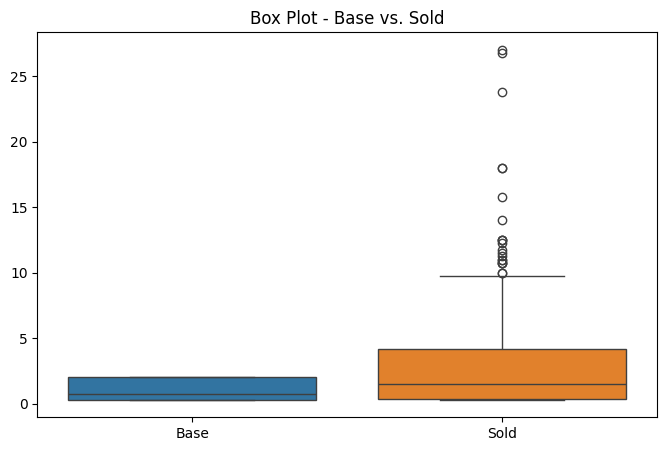

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Base','Sold']])
plt.title('Box Plot - Base vs. Sold')
plt.show()

### Team-Wise Total Spent

<ipython-input-26-2bb42b512c2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_spent.index, y=team_spent.values, palette='viridis')


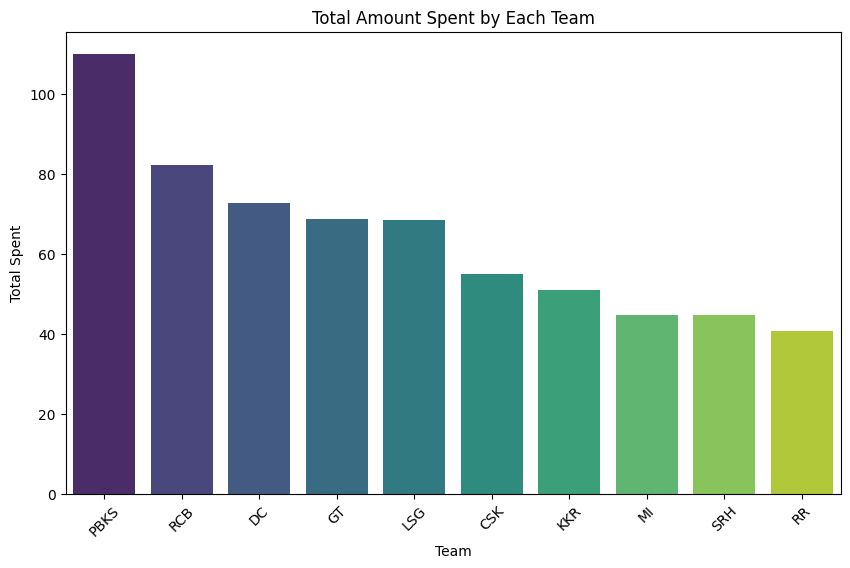

In [26]:
team_spent = df.groupby('Team')['Sold'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=team_spent.index, y=team_spent.values, palette='viridis')
plt.title('Total Amount Spent by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.show()

### Player Type Count


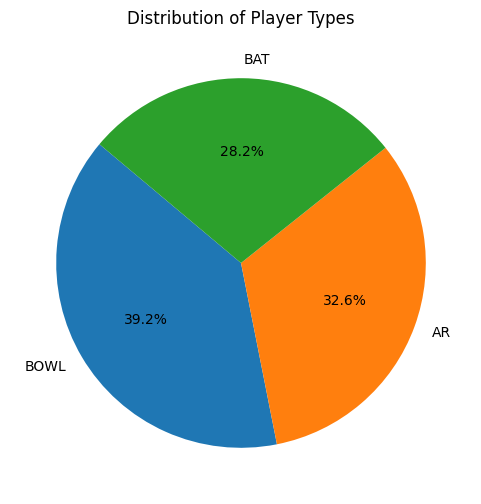

In [27]:
player_type_count = df['Type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(player_type_count, labels=player_type_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Player Types')
plt.show()


### Correlation Analysis

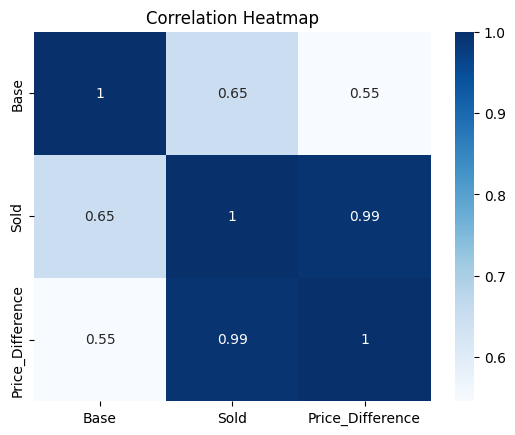

In [28]:
# If Base and Sold are numeric, check correlation
numerical_df = df[['Base', 'Sold', 'Price_Difference']]
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


### TOp players per role

In [29]:
top_batsmen = df[df['Type'] == 'BAT'].sort_values('Sold', ascending=False).head(5)
top_bowlers = df[df['Type'] == 'BOWL'].sort_values('Sold', ascending=False).head(5)
top_ar = df[df['Type'] == 'AR'].sort_values('Sold', ascending=False).head(5)

display(top_batsmen)
display(top_bowlers)
display(top_ar)

,Players,Team,Type,Base,Sold,Price_Difference
48,Rishabh Pant,LSG,BAT,2.0,27.00,25.00
47,Shreyas Iyer,PBKS,BAT,2.0,26.75,24.75
46,Jos Buttler,GT,BAT,2.0,15.75,13.75
55,KL Rahul,DC,BAT,2.0,14.00,12.00
76,Phil Salt,RCB,BAT,2.0,11.50,9.50


,Players,Team,Type,Base,Sold,Price_Difference
50,Arshdeep Singh,PBKS,BOWL,2.0,18.0,16.0
52,Yuzvendra Chahal,PBKS,BOWL,2.0,18.0,16.0
79,Trent Boult,MI,BOWL,2.0,12.5,10.5
80,Josh Hazlewood,RCB,BOWL,2.0,12.5,10.5
619,Jofra Archer,RR,BOWL,2.0,12.5,10.5


,Players,Team,Type,Base,Sold,Price_Difference
66,Venkatesh Iyer,KKR,AR,2.0,23.75,21.75
71,Marcus Stoinis,PBKS,AR,2.0,11.00,9.00
65,Ravichandran Ashwin,CSK,AR,2.0,9.75,7.75
53,Liam Livingstone,RCB,AR,2.0,8.75,6.75
69,Harshal Patel,SRH,AR,2.0,8.00,6.00


### TOp batsman

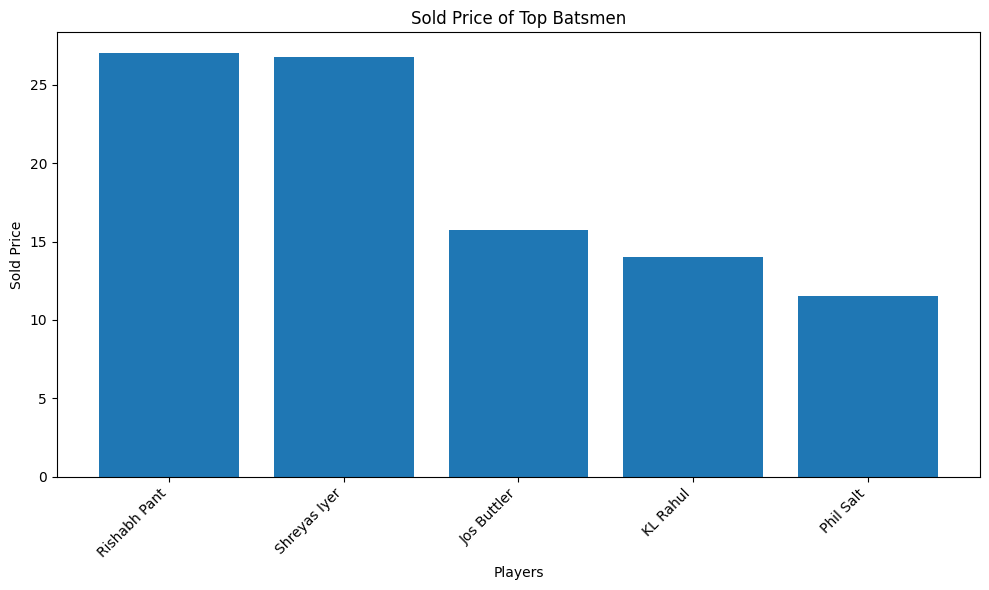

In [30]:

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(top_batsmen['Players'], top_batsmen['Sold'])
plt.xlabel('Players')
plt.ylabel('Sold Price')
plt.title('Sold Price of Top Batsmen')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [31]:
# Example: Number of Batsmen, Bowlers, All-rounders in each team
composition = df.groupby(['Team', 'Type']).size().unstack(fill_value=0)
composition

Type,AR,BAT,BOWL
Team,,,
CSK,9,5,6
DC,8,6,5
GT,7,5,8
KKR,3,7,5
LSG,5,6,7
MI,5,4,9
PBKS,10,6,7
RCB,7,4,8
RR,2,3,9


# IPL Mega Auction 2025 - EDA Project
# Conclusion
This project analyzes the IPL 2025 Mega Auction dataset to derive key insights about player pricing, team strategies, and auction trends.

## 📊 Dataset Overview

- **Source**: [Kaggle - IPL 2025 Mega Auction Dataset](https://www.kaggle.com/datasets/souviksamanta1053/ipl-2025-mega-auction-dataset)
- **Rows**: 623 Players
- **Columns**: Player Name, Team, Type (BAT, BOWL, AR, WK), Base Price, Final Sold Price

## 🛠️ Tools Used

- Python (Pandas, NumPy, Matplotlib, Seaborn)
- Jupyter Notebook

## 📌 Key Insights

- No null values after preprocessing; non-numeric values handled effectively.
- Top players like Rishabh Pant and Shreyas Iyer were sold for over ₹25 Cr.
- PBKS emerged as the highest-spending team.
- All-Rounders were highly valued compared to other player types.
- Price difference metric revealed undervalued players at base who became auction stars.
